# Decision Tree Regression

## Importando as Bibliotecas

In [ ]:
!pip install yfinance --upgrade --no-cache-dir

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.54)


In [ ]:
# ignoring future-warning 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# importing libraries to the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import yfinance as yf

# importing machine learning libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

plt.style.use('default')

In [ ]:
# allows pandas_datareader to get yahoo data (returns dataframe)
yf.pdr_override()

## Importando os Datasets

In [ ]:
# setting start and end dates
start_date = "2016-01-01"
end_date = "2020-06-01"

In [ ]:
# loading IBOV Index data inside a dataframe
df_ibov = web.get_data_yahoo('^BVSP', start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [ ]:
pd.options.display.float_format = '{:.5f}'.format #supress the scientific value

In [ ]:
#df_ibov = df_ibov[['Open', 'High', 'Low', 'Volume', 'Close']]
df_ibov = df_ibov[['Open', 'Close']]

In [ ]:
X = df_ibov[['Open']]
y = df_ibov[['Close']]

## Trinando os Modelos e Predizendo

In [ ]:
# split data in 75% trainning and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
regressor = DecisionTreeRegressor(max_depth=5, max_leaf_nodes=5, random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=5,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
# criando a predição do valor de fechamento, baseado em X (open)
y_pred = regressor.predict(X_test)

In [ ]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(regressor, out_file='tree.dot') 

# Comparando os Resultados

In [ ]:
# comparing the results
#criando um DF
df_result = pd.DataFrame

df_result = X_test.copy()

#atribuindo a base de testes
df_result['Close'] = y_test.copy()

#criando a coluna de predição
df_result['Prediction'] = y_pred

df_result.head()

,Open,Close,Prediction
Date,,,
2016-08-01,57309.00000,56756.00000,53118.58416
2016-09-15,57068.00000,57909.00000,53118.58416
2016-03-04,47194.00000,49085.00000,53118.58416
2018-10-25,83124.00000,84084.00000,89843.48341
2018-08-03,79656.00000,81435.00000,75807.30851


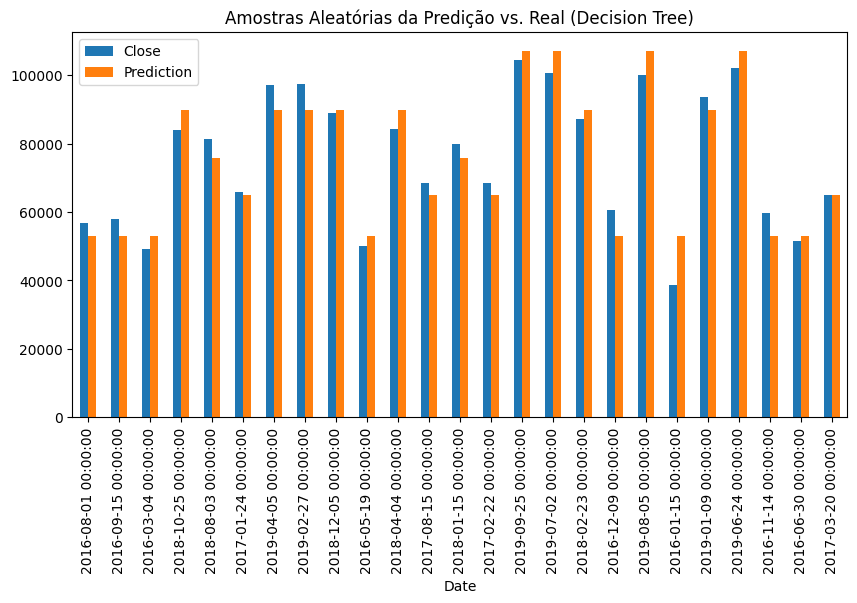

In [ ]:
# Comparing data  
df_bar = df_result[['Close', 'Prediction']].head(25)
df_bar.plot(kind='bar',figsize=(10,5))
plt.title('Amostras Aleatórias da Predição vs. Real (Decision Tree)')
plt.show()

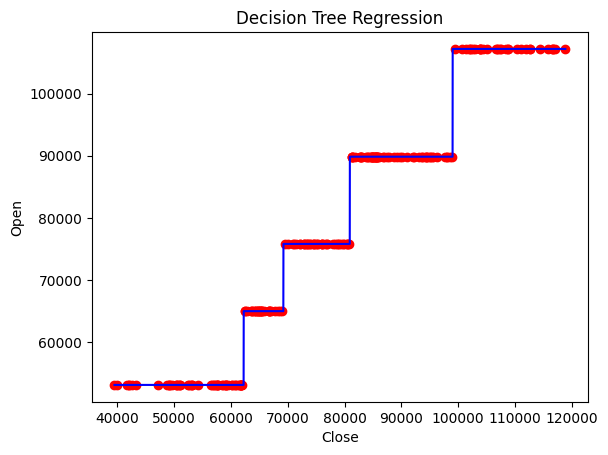

In [ ]:
X_grid = np.arange(min(X_test['Open']), max(X_test['Open']), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_pred, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Decision Tree Regression')
plt.xlabel('Close')
plt.ylabel('Open')
plt.show()

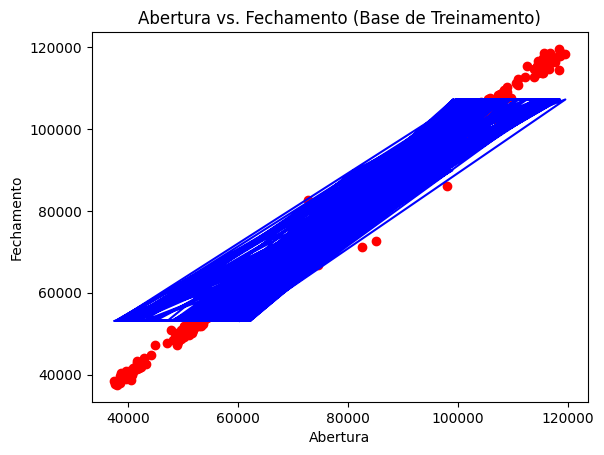

In [ ]:
plt.style.use('default')
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Abertura vs. Fechamento (Base de Treinamento)')
plt.xlabel('Abertura')
plt.ylabel('Fechamento')
plt.show()

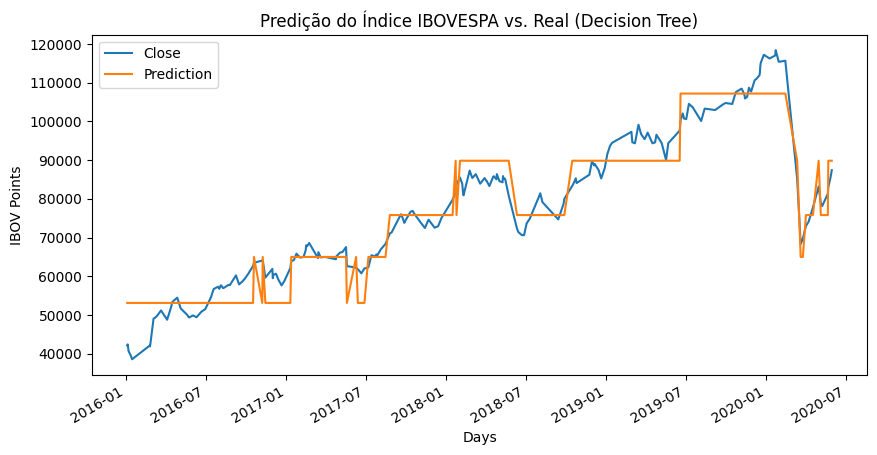

In [ ]:
df_result.drop('Open', 1).plot.line(figsize=(10, 5))
plt.title('Predição do Índice IBOVESPA vs. Real (Decision Tree)')
plt.xlabel('Days')
plt.ylabel('IBOV Points')
plt.legend(['Close', 'Prediction'])
plt.show()

# Coeficiente de Determinação

In [ ]:
#Erro quadrado R², o quanto uma variavel explica a outra
print(regressor.score(X_test, y_test))

0.9246173886294647


In [ ]:
# Important Metrics https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  # em média, meu modelo erra 746 pontos do ibov
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # norma do modelo

Mean Absolute Error: 4257.748304045038
Mean Squared Error: 26910786.653943885
Root Mean Squared Error: 5187.560761470066
